<a href="https://colab.research.google.com/github/ainunsyafna/Project-Microsoft-Stocks-Price-Prediction/blob/main/Microsoft_Stocks_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
url = 'https://raw.githubusercontent.com/ainunsyafna/Project-Microsoft-Stocks-Price-Prediction/main/Microsoft-Stocks.csv'

data = pd.read_csv(url)
data

,Date,Price,Open,High,Low,Volume
0,05/15/2023,309.46,309.10,309.90,307.59,16290000
1,05/12/2023,308.97,310.55,310.65,306.60,19770000
2,05/11/2023,310.11,310.10,311.12,306.26,31680000
3,05/10/2023,312.31,308.62,313.00,307.67,30080000
4,05/09/2023,307.00,308.00,310.04,306.31,21340000
...,...,...,...,...,...,...
9364,03/20/1986,0.10,0.10,0.10,0.09,58440000
9365,03/19/1986,0.10,0.10,0.10,0.10,47890000
9366,03/18/1986,0.10,0.10,0.10,0.10,66470000
9367,03/17/1986,0.10,0.10,0.10,0.10,133169999


#Pre Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9369 non-null   object 
 1   Price   9369 non-null   float64
 2   Open    9369 non-null   float64
 3   High    9369 non-null   float64
 4   Low     9369 non-null   float64
 5   Volume  9369 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 439.3+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.isna().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [6]:
data.duplicated().sum()

0

#Split Data

In [7]:
#Set the start and end dates for train and test sets
train_start_date = '1986-01-01'
train_end_date = '2022-12-31'
test_start_date = '2023-01-01'
test_end_date = '2023-12-31'

#Filter the data based on the date ranges
train = data[(data['Date'] >= train_start_date) & (data['Date'] <= train_end_date)]
test = data[(data['Date'] >= test_start_date) & (data['Date'] <= test_end_date)]

#Verify the train and test data
print("Train Data:")
print(train.head())
print("\nTest Data:")
print(test.head())

Train Data:
         Date   Price    Open    High     Low    Volume
92 2022-12-30  239.82  238.21  239.96  236.66  21940000
93 2022-12-29  241.01  235.65  241.92  235.65  19740000
94 2022-12-28  234.53  236.89  239.72  234.17  17200000
95 2022-12-27  236.96  238.70  238.93  235.83  16420000
96 2022-12-23  238.73  236.11  238.87  233.94  21210000

Test Data:
        Date   Price    Open    High     Low    Volume
0 2023-05-15  309.46  309.10  309.90  307.59  16290000
1 2023-05-12  308.97  310.55  310.65  306.60  19770000
2 2023-05-11  310.11  310.10  311.12  306.26  31680000
3 2023-05-10  312.31  308.62  313.00  307.67  30080000
4 2023-05-09  307.00  308.00  310.04  306.31  21340000


#Train Model

In [9]:
#Use Open stock price column to train model
train_data = train.iloc[:,2:3].values
print(train_data)
print(train_data.shape)

[[2.3821e+02]
 [2.3565e+02]
 [2.3689e+02]
 ...
 [1.0000e-01]
 [1.0000e-01]
 [1.0000e-01]]
(9277, 1)


In [10]:
#Normalize dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data)
scaled_data

array([[6.91144458e-01],
       [6.83714045e-01],
       [6.87313151e-01],
       ...,
       [2.90250486e-05],
       [2.90250486e-05],
       [2.90250486e-05]])

In [12]:
#Creating X Train and Y Train Data
X_train = []
y_train = []
for i in range(60,9277):
  X_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train)
print(X_train.shape)
print(y_train)
print(y_train.shape)

[[6.91144458e-01 6.83714045e-01 6.87313151e-01 ... 6.76167533e-01
  6.98952196e-01 7.19356805e-01]
 [6.83714045e-01 6.87313151e-01 6.92566685e-01 ... 6.98952196e-01
  7.19356805e-01 7.13725945e-01]
 [6.87313151e-01 6.92566685e-01 6.85049197e-01 ... 7.19356805e-01
  7.13725945e-01 7.11113691e-01]
 ...
 [5.80500972e-05 5.80500972e-05 5.80500972e-05 ... 0.00000000e+00
  2.90250486e-05 2.90250486e-05]
 [5.80500972e-05 5.80500972e-05 5.80500972e-05 ... 2.90250486e-05
  2.90250486e-05 2.90250486e-05]
 [5.80500972e-05 5.80500972e-05 8.70751459e-05 ... 2.90250486e-05
  2.90250486e-05 2.90250486e-05]]
(9217, 60)
[7.13725945e-01 7.11113691e-01 6.83017444e-01 ... 2.90250486e-05
 2.90250486e-05 2.90250486e-05]
(9217,)


In [13]:
#Reshape data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(9217, 60, 1)

In [14]:
#Build model
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [15]:
#Fitting model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
289/289 [==============================] - 27s 73ms/step - loss: 0.0016
Epoch 2/50
289/289 [==============================] - 19s 66ms/step - loss: 5.5081e-04
Epoch 3/50
289/289 [==============================] - 27s 93ms/step - loss: 5.3320e-04
Epoch 4/50
289/289 [==============================] - 21s 73ms/step - loss: 4.2366e-04
Epoch 5/50
289/289 [==============================] - 31s 106ms/step - loss: 3.8514e-04
Epoch 6/50
289/289 [==============================] - 26s 90ms/step - loss: 3.4308e-04
Epoch 7/50
289/289 [==============================] - 36s 123ms/step - loss: 3.8732e-04
Epoch 8/50
289/289 [==============================] - 30s 104ms/step - loss: 4.2043e-04
Epoch 9/50
289/289 [==============================] - 23s 81ms/step - loss: 3.2355e-04
Epoch 10/50
289/289 [==============================] - 19s 64ms/step - loss: 3.3364e-04
Epoch 11/50
289/289 [==============================] - 24s 82ms/step - loss: 3.7372e-04
Epoch 12/50
289/289 [=====================

In [16]:
test_data = test
actual_stock_price = test_data.iloc[:,2:3].values
print(actual_stock_price)
print(actual_stock_price.shape)

[[309.1 ]
 [310.55]
 [310.1 ]
 [308.62]
 [308.  ]
 [310.13]
 [305.72]
 [306.24]
 [306.62]
 [307.76]
 [306.97]
 [304.01]
 [295.97]
 [296.7 ]
 [279.51]
 [282.09]
 [285.01]
 [285.25]
 [285.99]
 [291.57]
 [289.93]
 [287.  ]
 [283.59]
 [284.79]
 [285.75]
 [289.21]
 [283.21]
 [285.85]
 [287.23]
 [286.52]
 [283.73]
 [284.23]
 [278.96]
 [275.79]
 [280.5 ]
 [277.24]
 [277.94]
 [273.4 ]
 [274.88]
 [276.98]
 [278.26]
 [265.2 ]
 [259.98]
 [256.75]
 [247.4 ]
 [251.08]
 [255.82]
 [254.04]
 [256.3 ]
 [256.42]
 [252.19]
 [246.55]
 [250.76]
 [249.07]
 [252.46]
 [249.96]
 [255.56]
 [254.09]
 [254.48]
 [259.39]
 [264.02]
 [268.32]
 [272.67]
 [267.64]
 [261.53]
 [273.8 ]
 [273.2 ]
 [260.53]
 [257.44]
 [259.54]
 [258.82]
 [248.  ]
 [243.45]
 [244.51]
 [248.99]
 [243.65]
 [234.48]
 [242.5 ]
 [241.1 ]
 [234.85]
 [233.78]
 [241.57]
 [237.97]
 [237.  ]
 [235.26]
 [231.29]
 [227.76]
 [226.45]
 [223.  ]
 [227.2 ]
 [232.27]
 [243.08]]
(92, 1)


In [21]:
data_total = pd.concat((train['Open'], test['Open']), axis=0)
inputs = data_total[len(data_total)-len(test_data)-60:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 92):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [22]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 817ms/step


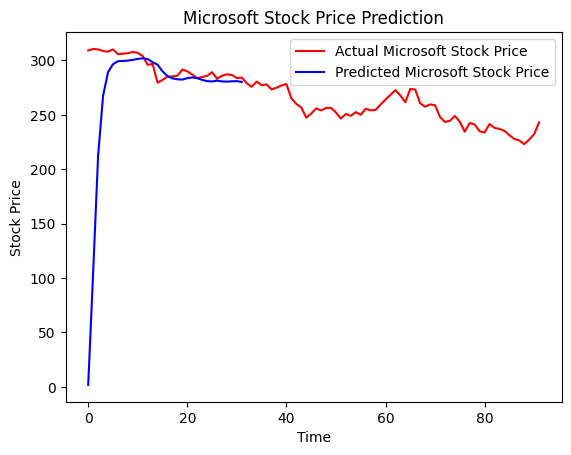

In [23]:
plt.plot(actual_stock_price, color='red', label='Actual Microsoft Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()